<center><h1> TD N°1 : SVM avec sklearn </h1></center>
    
    
Pour installer un package vous pouvez utiliser la commande suivante :
    
```
!pip install <nom_module>
```

## Import package

In [1]:
import os

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn import datasets

#sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

#Classifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC 
from sklearn.linear_model import SGDClassifier , LogisticRegression

from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
#Regressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score ,learning_curve ,GridSearchCV
from sklearn_evaluation import plot

#Web request
import requests
import io


## Function

**Merci de lire comment s'utilise la fonction avant de l'utiliser !**

In [2]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    
    '''
    
    SEULEMENT pour la fonction SVC de sklearn, pas de LINEARSVC
    
    Function qui permet de recupérer la constante et le coefficient directeur
    d'un svm après entraintement.
    
    Un svm lineaire est de la forme w0*w0+w1*x1 +b =0
    donc 
    >= x1= -w0/w1 *x0 -b/w1
    
    avoir x1 en fonction de x0 permet de tracer la zone de décision du SVM 
    et ainsi avoir une réprésentation graphique
    
    Pour calculer les marges on rajoute +- 1/w[1]
    
    
    '''
    
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [3]:
def svm_f_importances(coef_svm , names):
    ''' 
    Cette fonction permet de visualiser l'importance de chaque variable pour le modèle SVM
    Vous devez passer 2 arguments :
    
    - coef_svm : Les coefficients du modèle disponible après votre .fit()
      On le récupère avec la commande suite  svc_fit.coef_[0]
      
    - names : est le nom des features que vous avez utilisées.
      ATTENTION les passer dans le même ordre que pour l'entrainement du modèle
    
    '''
    imp = coef_svm
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

#features_names = ['input1', 'input2']
#svm = svm.SVC(kernel='linear')
#svm.fit(X, Y)
#f_importances(svm.coef_[0], features_names)

## Exercice N°1 : Classification données IRIS avec un SVM


#### Exploration and data analysis (EDA)
1) Importer le dataset Iris

2) Faire des stats descriptives pour mieux comprendre le dataset

3) Recoder les données dans le bon format si nécessaire 

4) Découper le dataset en train et test

#### Modélisation binaire (2 target)

5) Importer les modèles de  **régression logistic , SVC, LinearSVC et SGDClassifier** avec sklearn

6) Choisir maximum 2 colonnes dans votre nouveau data et entrainer un SVM avec le module SVC.<br>
- 6.1) Tracer la frontière de décision de votre modèle avec la fonction fournie. Visualiser le résultat.<br>
- 6.2) Faites varier le critère de régularisation $C$ et regarder son impact sur la frontière de décision. Tester plusieurs valeurs.<br>
- 6.3) Commenter l'effet de C sur votre modèle<br>
- 6.4) Recommencer avec une autre paire de features pour fit votre modèle.<br>


7) Entrainer les 4 modèles sur les données et évaluer la performance des modèles (uniquement avec le dataset train)<br>
   Utiliser les valeurs par défaut des modèles, ne pas tuner.<br>
   Réaliser une cross-validation pour évaluer votre modèle.<br>
   Justifier le type de cross_validation choisie.<br>

8) Imaginons que ce soit le SVM par défaut qui donne le meilleur score, tuner ce modèle pour l'améliorer
- 8.1) Utiliser un grid search pour définir les meilleurs hyperparamètres.<br>
- 8.2) Utiliser une learning curve pour voir comment votre modèle apprend à partir des données.<br>
- 8.3) **Uniquement si vous avez le temps**, examiner l'influence des hyperparamètres sur la qualité de votré modèle avec des          *validation curve*.

9) Entrainer votre modèle sur les meilleurs hyperparamètres. 

10) Réaliser une prédiction avec votre modèle sur le dataset test.<br> 
    Evaluer la performance de votre modèle.<br>
    Regarder les variables qui participent le plus à votre modèle, utiliser la fonction fournie.<br>
    Commenter les résultats


#### Modélisation multiclass

11) A partir du dataset iris avec les 3 espèces, réaliser une classification multiclass.
- 11.1) Tester les différentes méthodes, OVR et OVO  
- 11.2) Existe-il des différences entre les méthodes?

## Partie code, a vous de jouer 🐍

### Exploration and data analysis

#### 1) Importer le dataset Iris depuis sklearn

In [4]:
#1
#Import dataset from sklearn

sk_iris = datasets.load_iris()

#Si besoin
#iris = pd.DataFrame(data= np.c_[sk_iris.data, sk_iris.target], columns=sk_iris['feature_names']+['species'] )

#### 2) Statistiques descriptives

In [5]:
#Tester pygwalker si vous avez le temps


In [6]:
 # Vous pouvez tester Pygwalker ici ?


#### 3) Recoder variables, si besoin

In [7]:
# Convert the dataset to a pandas DataFrame and display the first few rows
iris_df = pd.DataFrame(data=sk_iris.data, columns=sk_iris.feature_names)
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Modélisation binaire

Attention à bien choisir un dataset contenant uniquement **2** espèces pour la modélisation

In [8]:
# Filter the dataset to include only 'setosa' and 'versicolor'
binary_iris_df = iris_df[sk_iris.target != 2]
binary_target = sk_iris.target[sk_iris.target != 2]

# Display the first few rows of the new binary classification dataset
binary_iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### 4) Découper data set en train et test

In [9]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(binary_iris_df, binary_target, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (80, 4), (80,)
Testing set shape: (20, 4), (20,)


#### 5) Importer les modules pour la modélisation

#### 6) Garder uniquement 2 colonnes du dataset et entrainer un SVM avec module SVC

6.1) Tracer la frontière de décision de votre modèle avec la fonction **plot_svc_decision_boundary**. Visualiser le résultat.<br>
6.2) Faites varier le critère de régularisation $C$ et regarder son impact sur la frontière de décision. Tester plusieurs valeurs.<br>
6.3) Commenter l'effet de $C$ sur votre modèle<br>
6.4) Recommencer avec une autre paire de features pour fit votre modèle.<br>



#### Modélisation binaire avec uniquement 2 features ⚠️

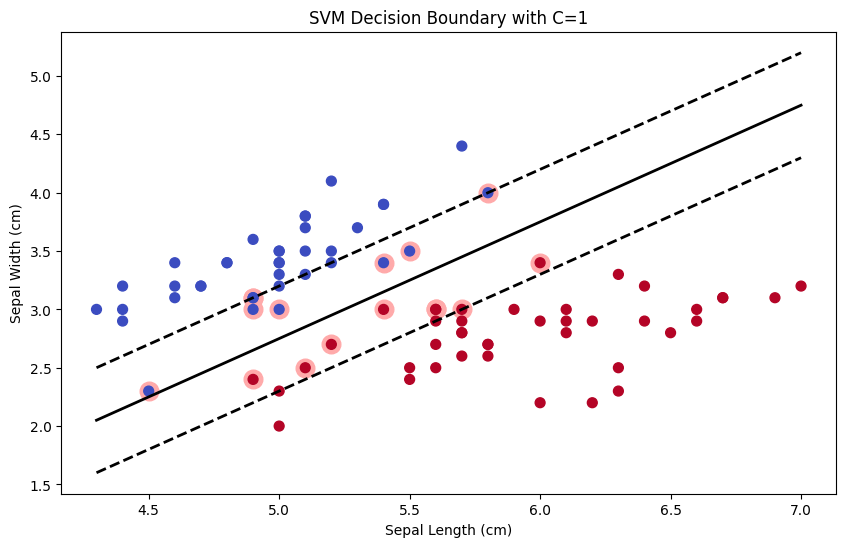

In [10]:
# Select two features for training
X_train_2_features = X_train[['sepal length (cm)', 'sepal width (cm)']]
X_test_2_features = X_test[['sepal length (cm)', 'sepal width (cm)']]

# Train an SVM with SVC
svc = SVC(kernel='linear', C=1)
svc.fit(X_train_2_features, y_train)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plot_svc_decision_boundary(svc, X_train_2_features['sepal length (cm)'].min(), X_train_2_features['sepal length (cm)'].max())
plt.scatter(X_train_2_features['sepal length (cm)'], X_train_2_features['sepal width (cm)'], c=y_train, cmap='coolwarm', s=50)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('SVM Decision Boundary with C=1')
plt.show()

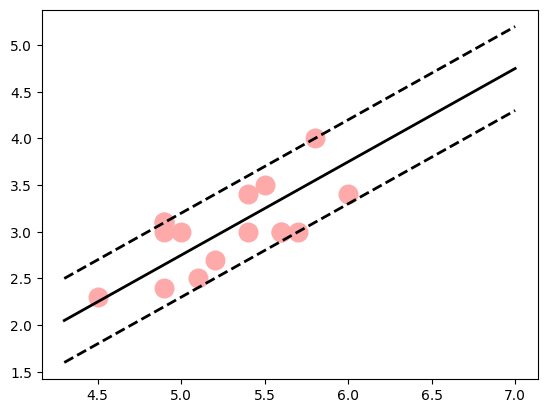

In [11]:
# utilsier plot_svc_decision_boundary()
plot_svc_decision_boundary(svc, X_train_2_features['sepal length (cm)'].min(), X_train_2_features['sepal length (cm)'].max())

In [12]:
#%matplotlib inline
#Utiliser la commande ci-dessus si votre sortie graphique n'affiche rien

### Faire varier le critère de régularisation C

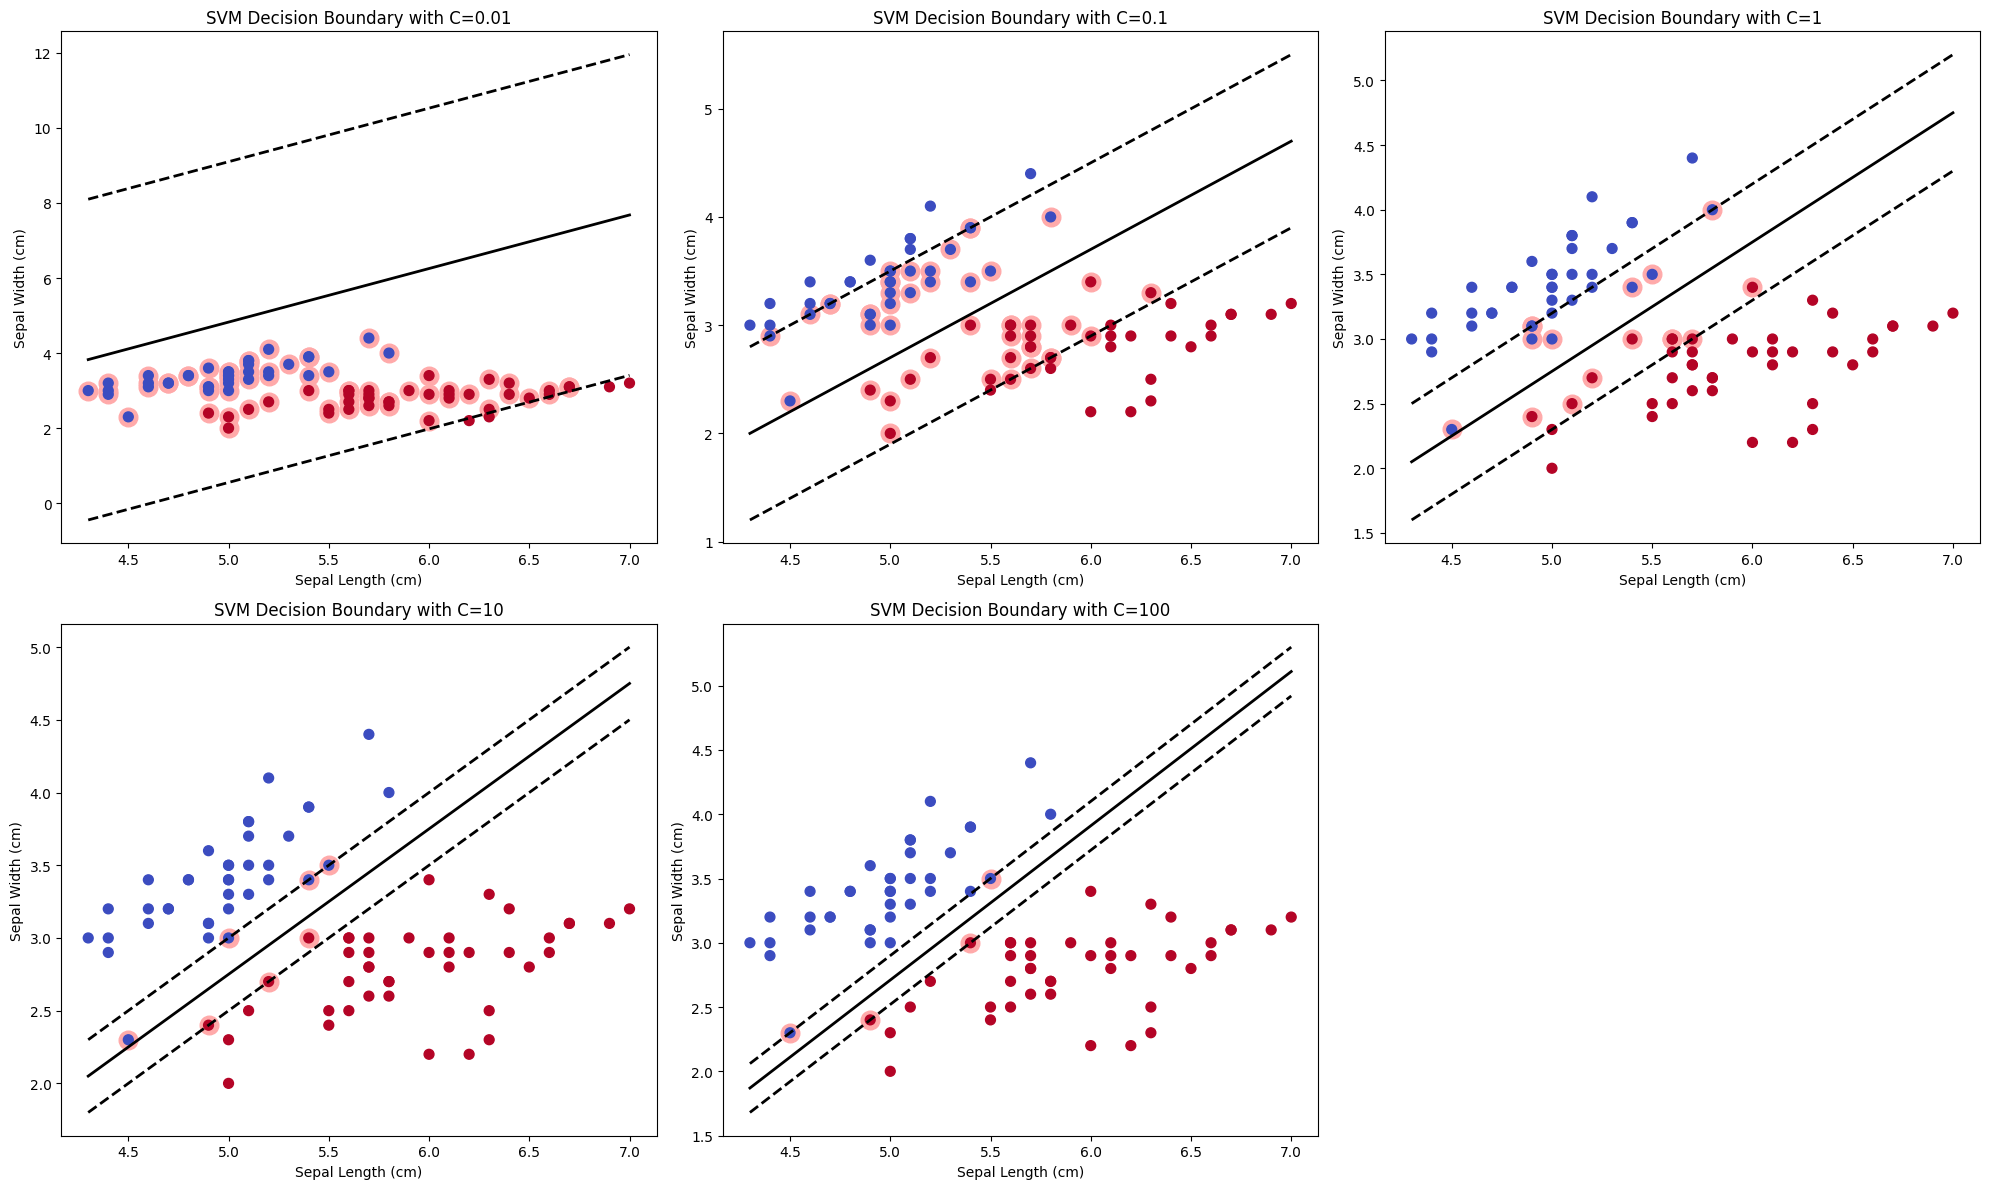

In [13]:
# Define a list of C values to test
C_values = [0.01, 0.1, 1, 10, 100]

# Plot the decision boundaries for different values of C
plt.figure(figsize=(20, 12))

for i, C in enumerate(C_values):
    svc = SVC(kernel='linear', C=C)
    svc.fit(X_train_2_features, y_train)
    
    plt.subplot(2, 3, i + 1)
    plot_svc_decision_boundary(svc, X_train_2_features['sepal length (cm)'].min(), X_train_2_features['sepal length (cm)'].max())
    plt.scatter(X_train_2_features['sepal length (cm)'], X_train_2_features['sepal width (cm)'], c=y_train, cmap='coolwarm', s=50)
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.title(f'SVM Decision Boundary with C={C}')

plt.tight_layout()
plt.show()

##### Commenter l'effet de C

Faible \C\ : Préfère une marge plus large, permettant des erreurs de classification. Meilleur pour la généralisation mais peut sous-ajuster.

Élevé \C\ : Priorise la classification correcte des points d'entraînement au détriment d'une plus petite marge. Peut surajuster aux données d'entraînement.

L'effet de \C\ est donc crucial pour ajuster le modèle SVM afin d'obtenir le bon équilibre entre biais et variance, influençant la capacité du modèle à généraliser aux nouvelles données.

#### Changer de paire de feature

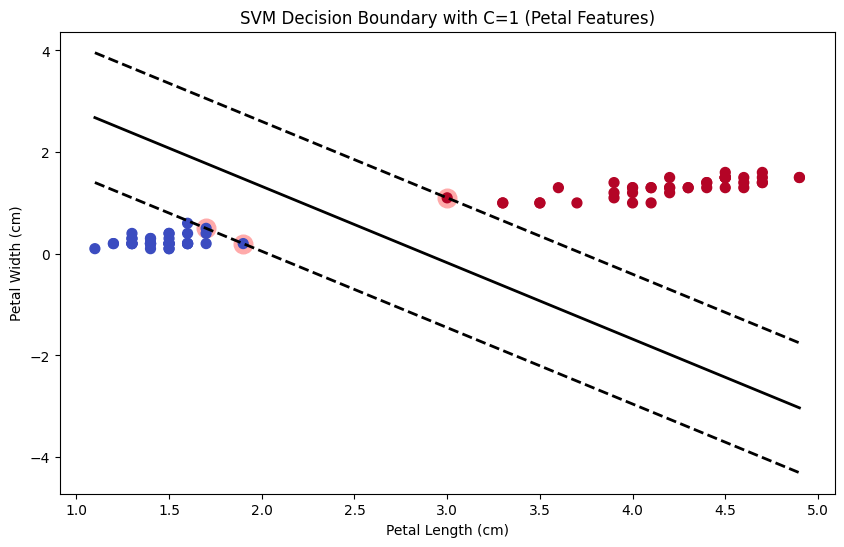

In [14]:
# Select a different pair of features for training
X_train_new_features = X_train[['petal length (cm)', 'petal width (cm)']]
X_test_new_features = X_test[['petal length (cm)', 'petal width (cm)']]

# Train an SVM with SVC using the new pair of features
svc_new = SVC(kernel='linear', C=1)
svc_new.fit(X_train_new_features, y_train)

# Plot the decision boundary for the new pair of features
plt.figure(figsize=(10, 6))
plot_svc_decision_boundary(svc_new, X_train_new_features['petal length (cm)'].min(), X_train_new_features['petal length (cm)'].max())
plt.scatter(X_train_new_features['petal length (cm)'], X_train_new_features['petal width (cm)'], c=y_train, cmap='coolwarm', s=50)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('SVM Decision Boundary with C=1 (Petal Features)')
plt.show()

#### 7) Entrainer les 4 modèles sur votre dataset d'entrainement

- LogisticRegression
- LinearSVC
- SVC
- SGDClassifier

Conseils :
- Utiliser les valeurs par défaut des modèles, ne pas tuner.<br>
- Réaliser une cross-validation pour évaluer votre modèle.<br>
- Justifier le type de cross_validation choisie.<br>



In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize the models
log_reg = LogisticRegression()
linear_svc = LinearSVC()
svc = SVC()
sgd_clf = SGDClassifier()

# List of models
models = [log_reg, linear_svc, svc, sgd_clf]
model_names = ['Logistic Regression', 'Linear SVC', 'SVC', 'SGD Classifier']

# Perform cross-validation and print the results
for model, name in zip(models, model_names):
    scores = cross_val_score(model, X_train_new_features, y_train, cv=5, scoring='accuracy')
    print(f"{name} - Accuracy: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

Logistic Regression - Accuracy: 1.00 (+/- 0.00)
Linear SVC - Accuracy: 1.00 (+/- 0.00)
SVC - Accuracy: 1.00 (+/- 0.00)
SGD Classifier - Accuracy: 1.00 (+/- 0.00)


La validation croisée k-fold avec k=5 est une méthode standard et efficace pour évaluer et comparer la performance des modèles de machine learning, offrant un bon équilibre entre biais, variance et utilisation des données.

##### Charger le dataset dispo dans le fichier cours_iae/01_svm/td/data/iris_noise.csv

In [16]:
# Load the dataset from the specified file
iris_noise_df = pd.read_csv('iris_noise.csv', sep=';')

# Display the first few rows of the dataset
iris_noise_df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


##### Modélisation binaire, 2 target

In [17]:
# Train an SVM with SVC using the new pair of features
svc_binary = SVC(kernel='linear', C=1)
svc_binary.fit(X_train_new_features, y_train)

# Predict on the test set
y_pred = svc_binary.predict(X_test_new_features)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.00
Confusion Matrix:
[[12  0]
 [ 0  8]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



Le modèle utilisé (SVM avec un noyau linéaire) évalue parfaitement.

#### 8)  Tuner le modèle SVM pour améliorer ses performances

A vous de choirsir entre **SGDClassifier** ou **SVC** ou **LinearSVC** mais justifier pourquoi l'un ou l'autre.

8.1) Utiliser un grid search pour définir les meilleurs hyperparamètres.<br>
8.2) Utiliser une learning curve pour voir comment votre modèle apprend à partir des données.<br>
8.3) Uniquement si vous avez le temps, examiner l'influence des hyperparamètres sur la qualité de votré modèle avec des validation curve.

In [18]:
#Obtenir les hyperparamètres d'un modèle
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

##### Choix hyperparamètre à tuner et grid search



In [28]:
params = {
    "kernel" : ["linear", 'rbf','poly'],
    "C" : [0.5, 1, 10, 50,100,1000]
        }

c_svc = SVC(random_state=42)

In [29]:
grid_c_svc = GridSearchCV(c_svc, param_grid=params, cv=10, return_train_score=True)
take_grid = grid_c_svc.fit(X_train, y_train)
take_grid.cv_results_

{'mean_fit_time': array([0.00725844, 0.00198092, 0.00175142, 0.00130017, 0.00129194,
        0.00136569, 0.0011503 , 0.00115299, 0.00140634, 0.00155056,
        0.00135026, 0.00139537, 0.00125301, 0.00134983, 0.00149097,
        0.00151339, 0.00155706, 0.00149639]),
 'std_fit_time': array([0.01725094, 0.00058827, 0.00060251, 0.0003318 , 0.00023937,
        0.00031831, 0.00023109, 0.00023384, 0.00030304, 0.00034886,
        0.0004498 , 0.00030438, 0.00034229, 0.00031969, 0.00044684,
        0.0003946 , 0.00048162, 0.00022381]),
 'mean_score_time': array([0.0016928 , 0.0010673 , 0.00105534, 0.00085273, 0.00085084,
        0.00093482, 0.00080178, 0.00094321, 0.00064297, 0.00080311,
        0.00104368, 0.00080431, 0.0008472 , 0.00080023, 0.00094225,
        0.00079989, 0.00094862, 0.00104682]),
 'std_score_time': array([0.0022854 , 0.00017091, 0.00034048, 0.00023099, 0.00039057,
        0.00014825, 0.00024205, 0.00014916, 0.00030201, 0.00040688,
        0.00027166, 0.00033419, 0.00022737, 

<Axes: title={'center': 'Grid search results'}, xlabel='C', ylabel='Mean score'>

<Figure size 600x400 with 0 Axes>

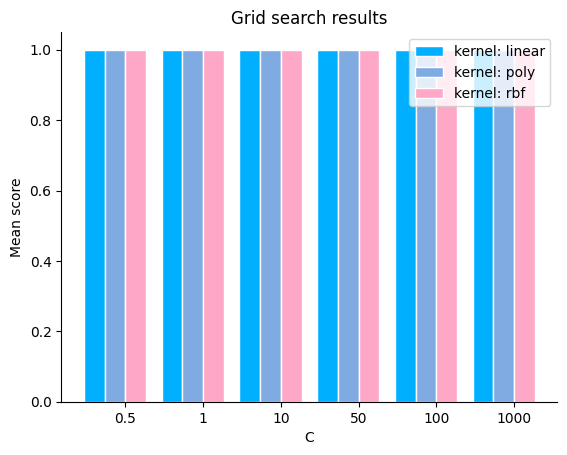

In [30]:
plt.figure(figsize=(6,4))
plot.grid_search(take_grid.cv_results_, change='C', kind='bar')

##### Learning curve

#### 9) Entrainer votre modèle sur les hyperparamètres qui donne la meilleur performance

##### Commenter la qualité de prédiction



#### 10) Réaliser une prédiction avec votre modèle sur le dataset test. 

- Evaluer la performance de votre modèle 
- Regarder les variables qui participent le plus à votre modèle, utiliser la fonction fournie 
- Commenter les résultats

#### Performance in et out sample

#### Influence de vos features sur le modèle

In [19]:
#plt.title('nom_sympa')
#plt.xlabel('Valeur des coéfficients')
#svm_f_importances(<model_coef>, features_names)


## Exercice N°2 : Modélisation multiclass avec dataset IRIS

#### 1) Importer le dataset Iris depuis sklearn

Avec le module datasets.load_iris(). **A ce stade plus besoin d'utiliser le dataset Iris modifié.**

Ne supprimer pas la 3ème espèce de fleur, nous allons maintenant utiliser les 3 target.

In [32]:
# Import dataset from sklearn
sk_iris = datasets.load_iris()

# Convert the dataset to a pandas DataFrame and display the first few rows
iris_df = pd.DataFrame(data=sk_iris.data, columns=sk_iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### 2 Entrainer un SVM pour une classification multiclass

- Définir la stratégie en s'appuyant sur les éléments vus en cours
- Que faut-il modifier pour que le SVM puisse faire une classification multiclass?

- Combien de modèles faut-il prédire?
- Tester avec la méthode OVO et OVR

#### Stratégie




**Nombre de modèles**




#### Test modélisation

In [33]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(binary_iris_df, binary_target, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

Training set shape: (80, 4), (80,)
Testing set shape: (20, 4), (20,)


In [40]:
#Import OVO, OVR
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
#Import SVM
from sklearn.svm import SVC

OvR_SVC_clf = OneVsRestClassifier(SVC())

OvR_SVC_clf.fit(X_train, y_train)

# Prédictions des étiquettes pour l'ensemble de test
y_pred = OvR_SVC_clf.predict(X_test)

# Afficher les premières prédictions
print(y_pred[:10])


[1 1 1 0 0 0 0 1 0 0]


In [39]:
# Créer un classificateur One-versus-One avec SVM
OvO_SVC_clf = OneVsOneClassifier(SVC())

# Entraîner le classificateur avec les données d'entraînement
OvO_SVC_clf.fit(X_train, y_train)

# Prédictions des étiquettes pour l'ensemble de test
y_pred = OvO_SVC_clf.predict(X_test)

# Afficher les premières prédictions
print(y_pred[:10])


[1 1 1 0 0 0 0 1 0 0]


3) Existe-t-il des différences entre OVO et OVR?

Non pas dans le cas présent (résultats).

<center><h3> Merci de rendre lisible votre code, un groupe présentera ses travaux à l'oral à la fin du cours.</h3></center>